<a href="https://colab.research.google.com/github/rscrafael/Curso_pandas/blob/main/Arrecada%C3%A7%C3%A3o_por_Munic%C3%ADpios_em_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titulo:
Arrecadação dos municipios de SC ICMS e IPVA

Autor: Rafael S. Cardozo
Data: 10/02/2023

```
# This is formatted as code
```



In [9]:
#Importado biblioteca pandas no Python
import pandas as pd

arrecadacao_df = pd.read_csv("icms_ipva.csv")

In [10]:
display(arrecadacao_df)

,VL_PGTO,MUNICIPIO,CD_GR_CLASSE_CONTABIL,NM_GR_CLASSE_CONTABIL,ANO,DS_MES,NU_MES,SK_LOCALIDAD
0,36568.77,Abdon Batista,43,ICMS,2022,JANEIRO,1,3883
1,56437.41,Abdon Batista,51,IPVA,2022,JANEIRO,1,3883
2,753.40,Abdon Batista,27,ITCMD,2022,JANEIRO,1,3883
3,360.11,Abdon Batista,78,OUTRAS RECEITAS,2022,JANEIRO,1,3883
4,1163.82,Abdon Batista,94,OUTRAS RECEITAS,2022,JANEIRO,1,3883
...,...,...,...,...,...,...,...,...
13256,3150.21,Águas Mornas,94,OUTRAS RECEITAS,2022,JULHO,7,3983
13257,30.77,Águas Mornas,43,ICMS,2022,AGOSTO,8,3983
13258,52772.94,Águas Mornas,51,IPVA,2022,AGOSTO,8,3983
13259,4711.33,Águas Mornas,27,ITCMD,2022,AGOSTO,8,3983


In [11]:
#Aqui criamos um novo Dataframe apenas com as colunas que eu quero...
arrecada_df = arrecadacao_df[['VL_PGTO', 'MUNICIPIO', 'ANO', 'DS_MES']]
display(arrecada_df)
print(arrecada_df.info())

,VL_PGTO,MUNICIPIO,ANO,DS_MES
0,36568.77,Abdon Batista,2022,JANEIRO
1,56437.41,Abdon Batista,2022,JANEIRO
2,753.40,Abdon Batista,2022,JANEIRO
3,360.11,Abdon Batista,2022,JANEIRO
4,1163.82,Abdon Batista,2022,JANEIRO
...,...,...,...,...
13256,3150.21,Águas Mornas,2022,JULHO
13257,30.77,Águas Mornas,2022,AGOSTO
13258,52772.94,Águas Mornas,2022,AGOSTO
13259,4711.33,Águas Mornas,2022,AGOSTO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13261 entries, 0 to 13260
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VL_PGTO    13261 non-null  float64
 1   MUNICIPIO  13261 non-null  object 
 2   ANO        13261 non-null  int64  
 3   DS_MES     13261 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 414.5+ KB
None


In [12]:
#Municipio que mais arrecadou em SC
display(arrecada_df[['VL_PGTO', 'MUNICIPIO', 'ANO', 'DS_MES']].max())

VL_PGTO      805446725.29
MUNICIPIO    Águas Mornas
ANO                  2022
DS_MES              MARÇO
dtype: object

In [13]:
#Excluir as  coluna completamente vazia
arrecada_df.dropna(axis='columns', inplace=True)
print(arrecada_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13261 entries, 0 to 13260
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VL_PGTO    13261 non-null  float64
 1   MUNICIPIO  13261 non-null  object 
 2   ANO        13261 non-null  int64  
 3   DS_MES     13261 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 414.5+ KB
None


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
#Dataframe.loc[] com  multiplas condições para filtragem
#Quais são os preços, postos que vendem GASOLINA na minha cidade JOINVILLE, ordenado do menor valor de venda para o maior.
arrecada_df.loc(['MUNICIPIO'] == 'Joinville')
display(arrecada_df)

,VL_PGTO,MUNICIPIO,ANO,DS_MES
0,36568.77,Abdon Batista,2022,JANEIRO
1,56437.41,Abdon Batista,2022,JANEIRO
2,753.40,Abdon Batista,2022,JANEIRO
3,360.11,Abdon Batista,2022,JANEIRO
4,1163.82,Abdon Batista,2022,JANEIRO
...,...,...,...,...
13256,3150.21,Águas Mornas,2022,JULHO
13257,30.77,Águas Mornas,2022,AGOSTO
13258,52772.94,Águas Mornas,2022,AGOSTO
13259,4711.33,Águas Mornas,2022,AGOSTO


<Figure size 7200x7200 with 0 Axes>

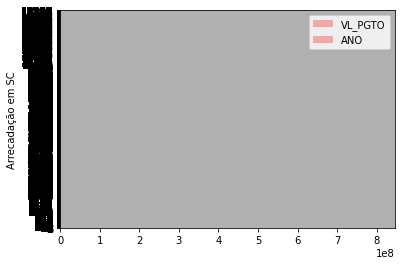

In [15]:
#Vamos fazer gráfico
import matplotlib.pyplot as plt

#Vou definir a área do gráfico
plt.figure(figsize=(100,100))

#Plotar o gráfico
arrecada_df.plot(
    kind="barh",
    xlabel="Arrecadação em SC",
    ylabel="Valores",
    color="red",
    alpha=0.3
)

#Grid
plt.grid()

#Exibe
plt.show()